In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraph, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/default/bbbar_Kgamma35_15161_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_noCheat_adrian.root")

# file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/kaon_info/bbbar_Kgamma35_15161_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_noCheat_adrian.root")
# file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/kaon_info/bbbar_Kgamma35_15161_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_noCheat_adrian_corrected.root")
file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/dEdx/rootfiles/AdrianCorr/output_250_all_tracks_ignoreoverlay_15162.root")



In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetFillColor(color)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

In [5]:
def makePrettyTGE(tge, color):
    tge.SetMarkerColor(color)
    tge.SetMarkerStyle(21)
    tge.SetMarkerSize(0.5)
    tge.SetLineColor(color)
    tge.SetTitle("")

In [6]:
kaon_dEdx_truth = file.Get("kaon")
proton_dEdx_truth = file.Get("proton")
pion_dEdx_truth = file.Get("pion")
electron_dEdx_truth = file.Get("electron")
muon_dEdx_truth = file.Get("muon")

kaon_dEdx_cos = file.Get("kaon_cos")
proton_dEdx_cos = file.Get("proton_cos")
pion_dEdx_cos = file.Get("pion_cos")
electron_dEdx_cos = file.Get("electron_cos")
muon_dEdx_cos = file.Get("muon_cos")

makePretty(kaon_dEdx_truth,kRed)
makePretty(proton_dEdx_truth,kGreen)
makePretty(pion_dEdx_truth,kBlue)
makePretty(electron_dEdx_truth,kBlack)
makePretty(muon_dEdx_truth,kGray)

makePretty(kaon_dEdx_cos,kRed)
makePretty(proton_dEdx_cos,kGreen)
makePretty(pion_dEdx_cos,kBlue)
makePretty(electron_dEdx_cos,kBlack)
makePretty(muon_dEdx_cos,kGray)

## dEdx vs. cos θ

In [7]:
c1 = TCanvas("c1", "c_dEdx",0,0,550,500);

In [8]:
pion_dEdx_cos.GetXaxis().SetTitle("cos#theta");
pion_dEdx_cos.GetYaxis().SetTitle("#frac{dE}{dx} [MeV]");

pion_dEdx_cos.Draw("p")
#proton_dEdx_cos.Draw("psame")
kaon_dEdx_cos.Draw("psame")
#electron_dEdx_cos.Draw("psame")
#muon_dEdx_cos.Draw("psame")

In [9]:
legendMean = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean.SetFillColor(kWhite)
legendMean.SetBorderSize(0)
legendMean.SetTextSize(0.03)
legendMean.AddEntry(kaon_dEdx_cos,"K","fp")
#legendMean.AddEntry(proton_dEdx_cos_truth,"p","fp")
legendMean.AddEntry(pion_dEdx_cos,"#pi","fp")
#legendMean.AddEntry(electron_dEdx_cos_truth,"e","fp")
#legendMean.AddEntry(muon_dEdx_cos_truth,"#mu","fp")
legendMean.Draw()

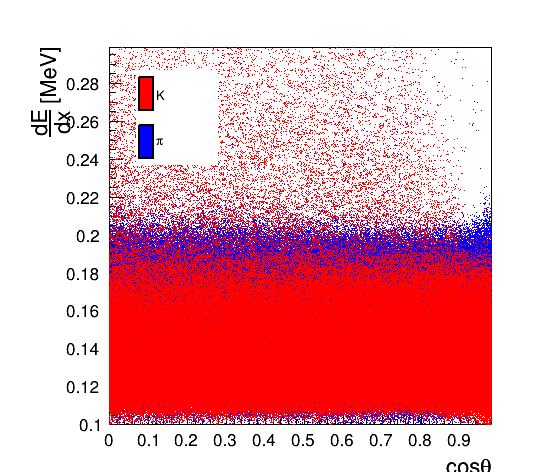

In [10]:
c1.Draw()

### Mean of the each bin

In [11]:
def CosMeanGraph(itr, hist, x, y, ex, ey):
    
    for i in range(itr):
        proj  = hist.ProjectionY("proj_kaon",i,i+1)
        x[i]  = hist.GetXaxis().GetBinCenter(i+1)
        y[i]  = proj.GetMean()
        ex[i] = hist.GetXaxis().GetBinWidth(i+1)/2.
        ey[i] = proj.GetRMS()

In [12]:
kaon_cos = np.empty(200, dtype=float)
kaon_mean_dEdx = np.empty(200, dtype=float)
e_kaon_cos = np.empty(200, dtype=float)
e_kaon_mean_dEdx = np.empty(200, dtype=float)
cosbinkaon = kaon_dEdx_cos.GetNbinsX()

CosMeanGraph(cosbinkaon, kaon_dEdx_cos, kaon_cos, kaon_mean_dEdx, e_kaon_cos, e_kaon_mean_dEdx)

pion_cos = np.empty(200, dtype=float)
pion_mean_dEdx = np.empty(200, dtype=float)
e_pion_cos = np.empty(200, dtype=float)
e_pion_mean_dEdx = np.empty(200, dtype=float)
cosbinpion = pion_dEdx_cos.GetNbinsX()

CosMeanGraph(cosbinpion, pion_dEdx_cos, pion_cos, pion_mean_dEdx, e_pion_cos, e_pion_mean_dEdx)

In [13]:
kaonproj = TGraphErrors(cosbinkaon, kaon_cos, kaon_mean_dEdx, e_kaon_cos, e_kaon_mean_dEdx)
pionproj = TGraphErrors(cosbinpion, pion_cos, pion_mean_dEdx, e_pion_cos, e_pion_mean_dEdx)

makePrettyTGE(kaonproj,kRed)
makePrettyTGE(pionproj,kBlue)

In [14]:
fkaonCos= TF1("fkaonCos","[0]+[1]*TMath::Power(x,[2])",0,1)
fkaonCos.SetLineColor(kRed)
fpionCos= TF1("fpionCos","[0]+[1]*TMath::Power(x,[2])",0,1)
fpionCos.SetLineColor(kBlue)

kaonproj.Fit(fkaonCos,"REMS")
pionproj.Fit(fpionCos,"REMS")

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=0.00634886 FROM MINOS     STATUS=FAILURE       359 CALLS        2148 TOTAL
                     EDM=1.23052e-05    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.39623e-01   5.26709e-03  -0.00000e+00   1.46490e+03
   2  p1          -7.26434e-03   1.79014e-02  -0.00000e+00   7.64946e+03
   3  p2           5.91244e+00   2.75991e+01   2.75991e+01   1.06398e-04
 FCN=0.00503454 FROM MINOS     STATUS=FAILURE       418

In [15]:
c1_51 = TCanvas("c1_51", "c_dEdx",0,0,550,500)
pionproj.GetXaxis().SetTitle("|cos#theta|");
pionproj.GetYaxis().SetTitle("#frac{dE}{dx} [MeV]");

pionproj.Draw("ALP")
fpionCos.Draw("same")
kaonproj.Draw("same")
fkaonCos.Draw("same")

In [16]:
legendMean2 = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean2.SetFillColor(kWhite)
legendMean2.SetBorderSize(0)
legendMean2.SetTextSize(0.03)
legendMean2.AddEntry(fkaonCos,"K","l")
#legendMean2.AddEntry(proton_dEdx_truth,"p","fp")
legendMean2.AddEntry(fpionCos,"#pi","l")
#legendMean2.AddEntry(electron_dEdx_truth,"e","fp")
#legendMean2.AddEntry(muon_dEdx_truth,"#mu","fp")
legendMean2.Draw()

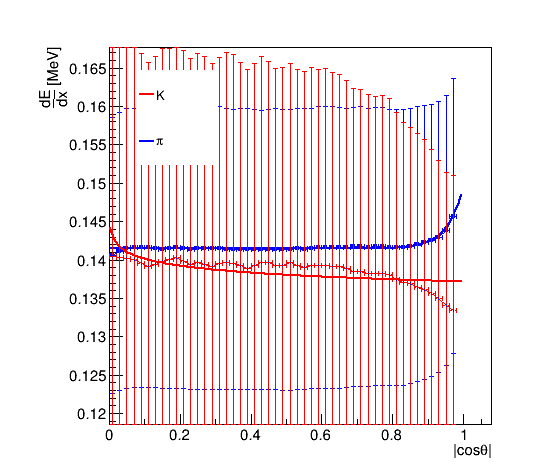

In [17]:
c1_51.Draw()

## dEdx vs. Momentum

### Truth

In [18]:
c2 = TCanvas("c2", "c_dEdx",0,0,550,500)

In [19]:
pion_dEdx_truth.GetXaxis().SetTitle("p [GeV]");
pion_dEdx_truth.GetYaxis().SetTitle("#frac{dE}{dx} [MeV/cm]");
pion_dEdx_truth.SetTitle("")

gPad.SetLogx()

pion_dEdx_truth.Draw("p")
proton_dEdx_truth.Draw("psame")
kaon_dEdx_truth.Draw("psame")
electron_dEdx_truth.Draw("psame")
muon_dEdx_truth.Draw("psame")

In [20]:
legendMean2 = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean2.SetFillColor(kWhite)
legendMean2.SetBorderSize(0)
legendMean2.SetTextSize(0.03)
legendMean2.AddEntry(kaon_dEdx_truth,"K","fp")
legendMean2.AddEntry(proton_dEdx_truth,"p","fp")
legendMean2.AddEntry(pion_dEdx_truth,"#pi","fp")
legendMean2.AddEntry(electron_dEdx_truth,"e","fp")
legendMean2.AddEntry(muon_dEdx_truth,"#mu","fp")
legendMean2.Draw()

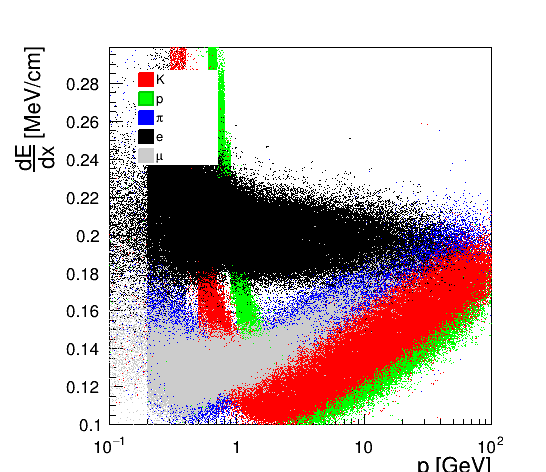

In [21]:
c2.Draw()

### Separation Power

In [22]:
def CalcSepPow(mean1,mean2,ey1,ey2):
    
    sep = abs(mean1 - mean2) / math.sqrt(0.5 * (ey1**2 + ey2**2))
    return sep
    

In [23]:
def PlotSepPow(itr,h1,h2,spwr,p):
    
    for i in range(itr):
        proj1 = h1.ProjectionY("proj1",i,i+1)
        proj2 = h2.ProjectionY("proj2",i,i+1)
        
        p[i] = h1.GetXaxis().GetBinCenter(i+1)
        
        mean1 = proj1.GetMean()
        mean2 = proj2.GetMean()
        
        ey1 = proj1.GetRMS()
        ey2 = proj2.GetRMS()
        
        spwr[i] = CalcSepPow(mean1,mean2,ey1,ey2)
        

In [24]:
dEdxNbins = kaon_dEdx_truth.GetNbinsX()

k_pi_spwr = np.empty(200, dtype=float)
mom       = np.empty(200, dtype=float)

PlotSepPow(dEdxNbins,kaon_dEdx_truth,pion_dEdx_truth,k_pi_spwr,mom)


In [25]:
plotSPW = TGraph(dEdxNbins, mom, k_pi_spwr)
makePrettyTGE(plotSPW,kBlue)

In [26]:
c3 = TCanvas("c3", "c_dEdx",0,0,550,500)

In [27]:
plotSPW.SetTitle(";Momentum (GeV);Separation Power")
gPad.SetLogx()
plotSPW.Draw()

In [28]:
legendMean3 = TLegend(0.65,0.85,0.8,0.65,"","brNDC")
legendMean3.SetFillColor(kWhite)
legendMean3.SetBorderSize(0)
legendMean3.SetTextSize(0.035)
legendMean3.AddEntry(plotSPW,"#pi/K","p")
legendMean3.Draw()

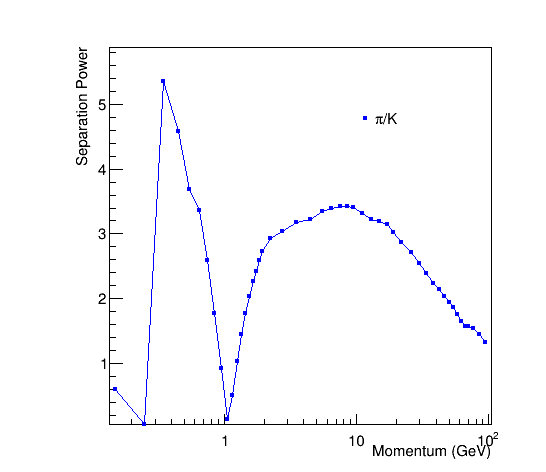

In [29]:
c3.Draw()